In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from connect_firestore import load_sound

drawim = 1

def fetch_time(id_):
    return str(id_['time'][-1]).rsplit(':', 2)[0]

def estimate_sound(id_1, id_2, id_3):
    id_1 = load_sound(id1)
    id_2 = load_sound(id2)
    id_3 = load_sound(id3)
    
    id_1_time = fetch_time(id_1)
    id_2_time = fetch_time(id_2)
    id_3_time = fetch_time(id_3)
    
    if id_1_time==id_2_time==id_3_time:
        vol_max = id_1['volume'] + id_2['volume'] + id_3['volume']
        vol_1 = id_1['volume'] / vol_max
        vol_2 = id_2['volume'] / vol_max
        vol_3 = id_3['volume'] / vol_max
        
        center_x = (vol_1*id_1['pos'][0] + vol_2*id_2['pos'][0] + vol_3*id_3['pos'][0]) 
        center_y = (vol_1*id_1['pos'][1] + vol_2*id_2['pos'][1] + vol_3*id_3['pos'][1]) 
        
    return (center_x, center_y)

#id_1 = load_sound('id_1')
#id_2 = load_sound('ID2')
#id_3 = load_sound('ID3')

#x, y = estimate_sound(id_1, id_2, id_3)
    

In [16]:
id_1 = load_sound('id_1')

In [17]:
volume = id_1['volume'][-1]
time = id_1['time'][-1]
position = (id_1['position_x'], id_1['position_y'])
print(
f'''
volume   : {volume}
time     : {time}
position : {position}
''')


volume   : 282
time     : 2020-12-05 14:54:53.734655+00:00
position : (4, 8)



In [18]:

id_1 = load_sound('id_1')

id_1_time = fetch_time(id_1)



In [21]:
id_1['volume']

[0, 279, 277, 277, 281, 277, 277, 276, 282]

In [22]:

vol_max = id_1['volume'][-1]
vol_1 = id_1['volume'][-1] / vol_max




In [24]:
center_x = (vol_1*position[0]) 
center_y = (vol_1*position[1]) 

In [25]:
(center_x, center_y)

(4.0, 8.0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from connect_firestore import load_sound
from gaussian import mk_gaussian
from PIL import Image

drawim = 1

def fetch_time(id_):
    return str(id_['time'][-1]).rsplit(':', 2)[0]

def estimate_sound(id_1, id_2, id_3):
    
    id_1_time = fetch_time(id_1)
    id_2_time = fetch_time(id_2)
    id_3_time = fetch_time(id_3)
    
    bias = 0
    
    id_1_vol = id_1['volume'][-1] - bias if id_1['volume'][-1]>bias else 0
    id_2_vol = id_2['volume'][-1] - bias if id_2['volume'][-1]>bias else 0
    id_3_vol = id_3['volume'][-1] - bias if id_3['volume'][-1]>bias else 0
    center_x, center_y = None, None
    #if id_1_time==id_2_time==id_3_time:
    vol_max = id_1_vol + id_2_vol + id_3_vol
    vol_1 = id_1_vol / vol_max if id_1_vol!=0 else 0
    vol_2 = id_2_vol / vol_max if id_2_vol!=0 else 0
    vol_3 = id_3_vol / vol_max if id_3_vol!=0 else 0

    
    center_x = (vol_1*id_1['position_x'] + vol_2*id_2['position_x'] + vol_3*id_3['position_x']) 
    center_y = (vol_1*id_1['position_y'] + vol_2*id_2['position_y'] + vol_3*id_3['position_y']) 
    #print((center_x, center_y))
    if center_x==0 and center_y==0:
        return (None, None), vol_max
    return (center_x, center_y), vol_max




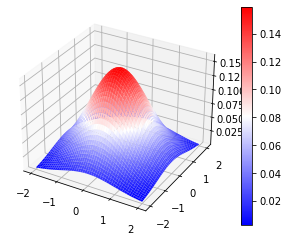

In [2]:

id_1 = load_sound('id_1')
id_2 = load_sound('id_2')
id_3 = load_sound('id_3')

(x, y), vol_max = estimate_sound(id_1, id_2, id_3)

if x!=None:
    base = np.zeros((100, 100))
    gauss_size = (50, 50)
    y = mk_gaussian(gauss_size, scale=2)


In [3]:
base[(int(x*100)-(gauss_size[0]//2)):(int(x*100)+(gauss_size[0]//2)), (int(x*100)-(gauss_size[0]//2)):(int(x*100)+(gauss_size[0]//2))] += y


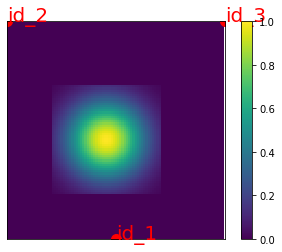

In [21]:
base /= base.max()

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.imshow(base,interpolation='nearest',cmap='viridis')
plt.colorbar()
plt.plot(id_1['position_x']*100, id_1['position_y']*100, marker='.', color='red', markersize=20)
plt.annotate('id_1', xy=(id_1['position_x']*100, id_1['position_y']*100), fontsize=20, color='red')
plt.plot(id_2['position_x']*100, id_2['position_y']*100, marker='.', color='red', markersize=20)
plt.annotate('id_2', xy=(id_2['position_x']*100, id_2['position_y']*100), fontsize=20, color='red')
plt.plot(id_3['position_x']*100, id_3['position_y']*100, marker='.', color='red', markersize=20)
plt.annotate('id_3', xy=(id_3['position_x']*100, id_3['position_y']*100), fontsize=20, color='red')
plt.xlim((0, 100))
plt.ylim((0, 100))
plt.tick_params(labelbottom=False,
               labelleft=False,
               labelright=False,
               labeltop=False)
plt.tick_params(bottom=False,
               left=False,
               right=False,
               top=False)
#if x!=None:
#    plt.plot(x, y, marker='o', color='red', markersize=80, markerfacecolor="None", markeredgecolor='red', markeredgewidth=2)
plt.savefig('sample2')
plt.show()

In [28]:


im = Image.open("images/cat.jpg")
ax.imshow(im, alpha=0.6)
plt.show()

0.1514863461587676

In [30]:
(base / base.max()).max()

1.0